In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#**WORLD COVID19 VACCINATION ANALYSIS**

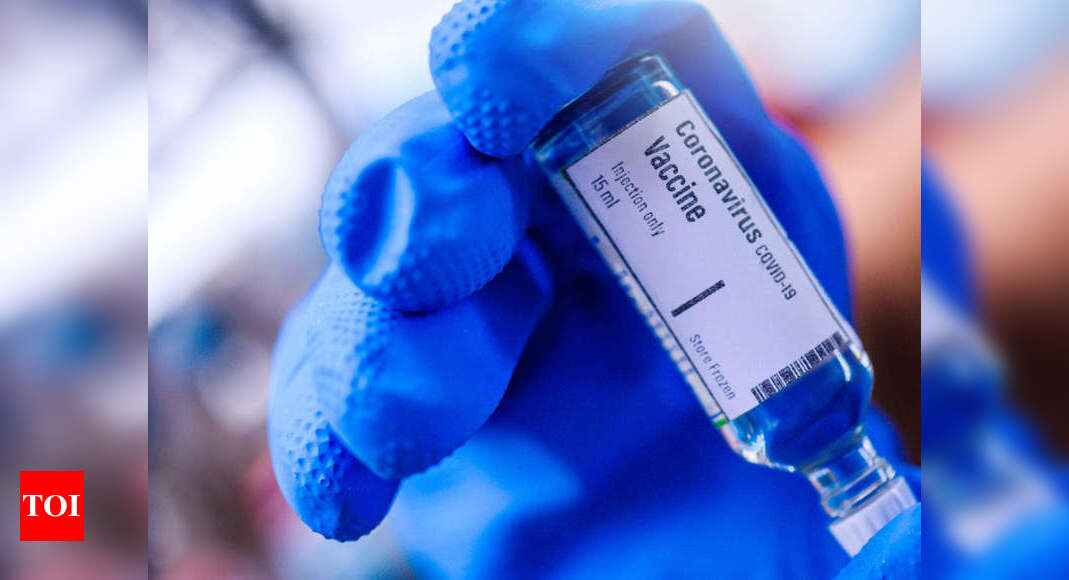

**Importing essential libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches

In [ ]:
data = pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")
data.head()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

**DATA CLEANING**

*   Here we check if any kind of NULL values are there.
*   If found, we replace those with 0, assuming nothing happened there.





In [ ]:
data.fillna(0,inplace=True)
data.isnull().sum()

**SOME BASIC INFORMATION**

In [ ]:
print("Vaccination date starts from ",data["date"].min()," till ",data["date"].max())
print("Total Countries vaccinated :",len(data["country"].unique()))
print("Total no. of vaccines used",len(data["vaccines"].unique()))


In [ ]:
data.country.unique()

In [ ]:
plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**DATA VISUALISATION**

In [ ]:
countrywise = data[data["date"]==data["date"].max()].groupby(["country"]).agg({"total_vaccinations":"sum","people_vaccinated":"sum","people_fully_vaccinated":"sum"})

In [ ]:
countrywise.head()

In [ ]:
top_10_countries_vaccinated = countrywise.sort_values(["total_vaccinations"],ascending=False).head(10)
top_10_worst_countries_vaccinated = countrywise.sort_values(["total_vaccinations"],ascending=False).tail(5)

In [ ]:
plt.figure(figsize=(15,8))
sns.catplot(x=top_10_countries_vaccinated["total_vaccinations"],y=top_10_countries_vaccinated.index,data=top_10_countries_vaccinated,ci=None,kind='bar',aspect=2,legend_out=False)
plt.title("disttribution of total vaccinated")
plt.show()

From above graph we conclude that :
*   United States leads in vaccination distribution.
*   followed by , India ranks at 2nd and then by Brazil.



In [ ]:
plt.figure(figsize=(15,5))
sns.catplot(x="total_vaccinations",y=top_10_worst_countries_vaccinated.index,data=top_10_worst_countries_vaccinated,kind='bar',palette='Blues',ci=None,aspect=2,legend_out=False)
plt.title("disttribution of total vaccinations")
plt.show()

From above see:
*   Montenego ,Tsunisia and Suriname are lowest in vaccination distribution.




**TOP 10 COUNTRIES THAT ARE VACCINATED PER HUNDRED**

In [ ]:
countrywise_per_hundred = data[data["date"]==data["date"].max()].groupby(["country"]).agg({"total_vaccinations_per_hundred":"sum","people_vaccinated_per_hundred":"sum","people_fully_vaccinated_per_hundred":"sum"})
top_10_countries_vaccinated_100 = countrywise_per_hundred.sort_values("total_vaccinations_per_hundred",ascending=False).head(10)

In [ ]:
sns.catplot(data=top_10_countries_vaccinated_100,x=top_10_countries_vaccinated_100.index,y='total_vaccinations_per_hundred',kind='bar',palette='Blues',ci=None,legend_out=False,aspect =2)
plt.ylabel('Total vaccinated population per hundred')
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def anime(value, title,color) : 
    
    
    data.sort_values(by='date', inplace = True)
    
    if color == None : 
        
        map = px.choropleth(data, locations ="country",
                                    locationmode = "country names", 
                                    color=value,
                                    hover_name="country",
                                    animation_frame="date")
    
    else : 
        
        map = px.choropleth(data, locations ="country",
                                locationmode = "country names", 
                                color=value,
                                hover_name="country",
                                animation_frame="date",
                                color_continuous_scale= color)

    map.update_layout(
        title_text = title,
        title_x = 0.5,
        geo=dict(showocean=True, oceancolor="#7af8ff",
                showland=True, landcolor="white",
                showframe = False))
    
    return map.show()

**COUNTRY WISE DAILY VACCINATIONS**

In [ ]:
plot = px.line(data, x = 'date', y ='daily_vaccinations', color = 'country')

plot.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)

plot.show()


In [ ]:
anime("daily_vaccinations","daily vaccination around the globe",None)

**COUNTRY WISE DAILY VACCINATIONS PER MILLION**

In [ ]:
plot_1 = px.line(data, x = 'date', y ='daily_vaccinations_per_million', color = 'country')

plot_1.update_layout(
    title={
            'text' : "Daily vaccination per million trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations per million"
)

plot_1.show()


In [ ]:
anime("daily_vaccinations_per_million","daily vaccinations per million around globe",None)

**MOST USED VACCINES**

In [ ]:
data["vaccines"].unique()

In [ ]:
vaccine = data.groupby(["vaccines","date"]).sum().reset_index()
vaccine = vaccine.groupby(["vaccines"]).max()

In [ ]:
plt.figure(figsize=(15,10))
sns.catplot(x="total_vaccinations",y=vaccine.index,data=vaccine,kind='bar',aspect=3,ci=None)
plt.title("Most used vaccine")
plt.show()

# TRACKING VACCINATION IN INDIA

In [ ]:
data_ind = data[data["country"]=="India"]
data_ind.tail()

**SOME BASIC INFORMATIONS**

In [ ]:
print("Basic information about Vaccination in India :-")
print("Vaccinations starts from ",data_ind["date"].min()," till ",data_ind["date"].max())
print("Total number of vaccinations administered :-",data_ind["total_vaccinations"].iloc[-1])
print("Total number of vaccinations done per hundred people:- ",data_ind["total_vaccinations_per_hundred"].iloc[-1])

In [ ]:
X = data_ind["date"]
Y1=data_ind["total_vaccinations"]
Y2 = data_ind["people_fully_vaccinated"]
Y3 = data_ind["people_vaccinated"]

plt.figure(figsize=(8,5))
plt.plot(X,Y1,linewidth=4,label="total vaccinations")
plt.plot(X,Y2,linewidth=3,label="people fully vaccinated")
plt.plot(X,Y3,linewidth=3,label="people vaccinated")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
z1=data_ind["people_vaccinated_per_hundred"]
z2=data_ind["people_fully_vaccinated_per_hundred"]
z3=data_ind["total_vaccinations_per_hundred"]


plt.figure(figsize=(8,5))
plt.plot(X,z1,linewidth=3,label="people vaccinated per hundred")
plt.plot(X,z2,linewidth=3,label="people fully vaccinated per hundred")
plt.plot(X,z3,linewidth=4,label="total vaccination per hundred")
plt.xticks(rotation=90)
plt.legend()
plt.show()

**MOST USED VACCINE IN INDIA**

In [ ]:
data_ind.vaccines.unique()

In [ ]:
vaccine_ind = data_ind.groupby(["vaccines","date"]).sum().reset_index()
vaccine_ind=vaccine_ind.groupby(["vaccines"]).max()

#plotting graph for most used vaccines
plt.figure(figsize=(15,5))
sns.catplot(x="total_vaccinations",y=vaccine_ind.index,data=vaccine_ind,kind='bar',ci=None,aspect=2)
plt.show()

So , its obvious from the graph that Covaxin , is the sole used vaccine in india 